# WEB SCRAPPING

In [2]:
import tweepy
import re
import csv
import json

In [3]:
#Twitter API credentials
consumer_key = "k4Eqq9W5YeZNlq2ZGKXWxd12n"
consumer_secret = "e5NsDmsDDnqpoPxC9yajfBSt11DNKmgs8OKFpsa3SKKgVdQFpW"
access_key = "1302618334865711104-9aoXpvpuBYJJ4K69dCX8XQZC3DNXum"
access_secret = "ZMYTAPNx8RJfLbrXaHOxQw4b0vZIecUUaksDE6uL1DdaQ"

alltweets = []	

def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [6]:
modi_tweets= get_all_tweets("@narendramodi")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2400 tweets downloaded so far
...2600 tweets downloaded so far
...2800 tweets downloaded so far
...3000 tweets downloaded so far
...3200 tweets downloaded so far
...3240 tweets downloaded so far
...3240 tweets downloaded so far


In [1]:
#importing the tweeets data set
import pandas as pd
import numpy as np
tweets=pd.read_csv("@narendramodi_tweets.csv")
tweets.head()

,Unnamed: 0,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,0,2020-09-07 12:32:10,[],[],9,None,1302947771276652544,hi,None,3,False,Twitter Media Studio,राष्ट्रीय शिक्षा नीति सिर्फ पढ़ाई-लिखाई के तौर...,India,Narendra Modi,None,None
1,1,2020-09-07 06:36:41,[],[],27973,None,1302858307766497281,hi,None,5812,False,Twitter Media Studio,बिहार के सीतामढ़ी के जिज्ञासु सिंह जी खेती में...,India,Narendra Modi,None,None
2,2,2020-09-07 06:20:45,"[{'text': 'Local4Poshan', 'indices': [9, 22]}]",[],13856,None,1302854298422796288,en,None,2972,False,Twitter for iPhone,Let’s be #Local4Poshan!\n\nOur nation is home ...,India,Narendra Modi,None,None
3,3,2020-09-07 06:15:27,"[{'text': 'POSHANMaah2020', 'indices': [58, 73]}]",[],11626,None,1302852966932574208,en,None,2487,False,Twitter Media Studio,Proper nutrition is vital to build a prosperou...,India,Narendra Modi,None,None
4,4,2020-09-07 05:08:10,[],[],25306,None,1302836032916783105,en,None,5149,False,Periscope,Addressing the Conference of Governors on Nati...,India,Narendra Modi,None,None


In [2]:
tweets["text"].count()

3240

In [3]:
#check the location wise tweets
location_df=pd.DataFrame({'location':tweets['location'].value_counts().index,'count':tweets['location'].value_counts().values})
location_df

,location,count
0,India,3240


In [4]:
#here we can see that modi tweeted in one location

In [5]:
#display first text of tweets data frame
tweets["text"][2]


'Let’s be #Local4Poshan!\n\nOur nation is home to dozens of healthy dishes, which have high nutrition value. Share the… https://t.co/54pjI7YSwE'

in the first tweet we can see that many stop words ,punctuation markd, links etc. so we have to remove all these from tweets

In [6]:
import nltk
import re # regular expression
#from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
def clean_data(text):#convert text into lower case letters,remove special characters,symbols
    #wordnet=WordNetLemmatizer()
    data=text.lower()
    data=re.sub('[^a-zA-Z]',' ',data)
    data = re.sub(r"(http|https|pic.)\S+"," ",data)
    data = re.sub("-" ," ",data) 
    data = re.sub('\'', "", data)
    data = re.sub("\n" ," ",data)
    return data

In [8]:
tweets['text']=tweets["text"].apply(clean_data)

In [9]:
#lets check the first tweets
tweets["text"][1]

'                                                                                                                        t co zgayzgrt v'

#here we can see that all punctuation marks and links are removed

In [10]:
#display all tweets
tweets['text']

0                                                     ...
1                                                     ...
2       let s be  local poshan   our nation is home to...
3       proper nutrition is vital to build a prosperou...
4       addressing the conference of governors on nati...
                              ...                        
3235                                                  ...
3236    greetings to  harsimratbadal  ji on her birthd...
3237                                                  ...
3238    congratulations  borisjohnson on assuming offi...
3239    releasing a book on our former pm chandra shek...
Name: text, Length: 3240, dtype: object

In [11]:
#check any null values present in the text
tweets.isnull().sum()

Unnamed: 0        0
time              0
hashtags          0
user_mentions     0
favorite_count    0
geo               0
id_str            0
lang              0
place             0
retweet_count     0
retweeted         0
source            0
text              0
location          0
name              0
time_zone         0
utc_offset        0
dtype: int64

In [12]:
#peform lammatization to remove stopwords in data set
lemmatizer=WordNetLemmatizer()
def remove_stopwords(text):
    words=nltk.word_tokenize(text)
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words("english"))]
    words=' '.join(words)
    return words

In [13]:
tweets["text"]=tweets["text"].apply(remove_stopwords)

In [14]:
tweets["text"].head(20)

0                                         co urec yir j
1                                         co zgayzgrt v
2     let local poshan nation home dozen healthy dis...
3     proper nutrition vital build prosperous nation...
4     addressing conference governor national educat...
5     tomorrow th september join conference rashtrap...
6     always remember pujya kesavananda bharati ji c...
7     rt india iran teachersday charanjot patwalia s...
8     rt indembmanila m jayasree pisharodi teacher p...
9     rt indian embassy teacher make difference clas...
10    better knowledgeable teacher deepen connect na...
11    remain grateful hardworking teacher contributi...
12        rule role rule based role based co oc ugpqokm
13                                         co bvqjdsaet
14                                         co sfgv ctli
15    congratulation exceptional innovator hardwork ...
16    rt pmoindia kiran shruthi hail tamil nadu serf...
17    rt pmoindia tanushree studied textile trai

In [15]:
tweets["text"][2]

'let local poshan nation home dozen healthy dish high nutrition value share co pji yswe'

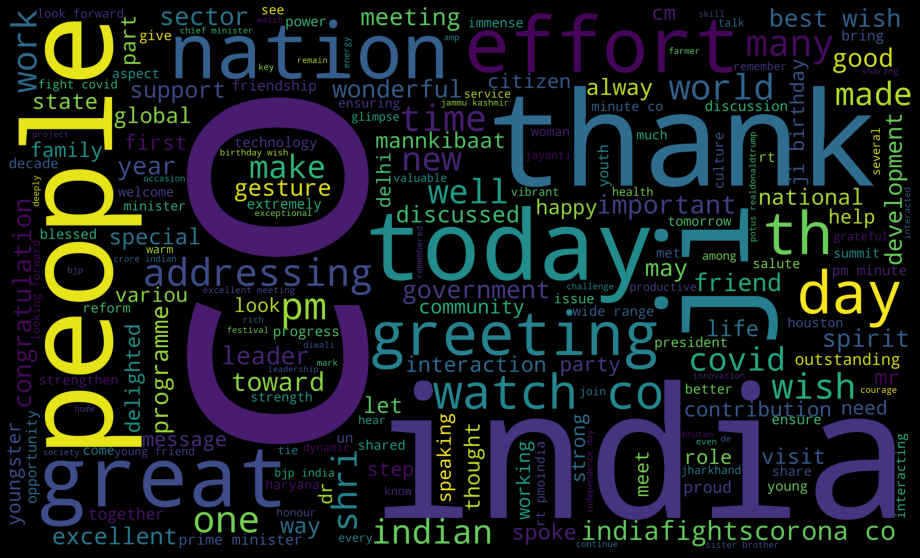

In [16]:
#plot wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=200).generate(" ".join(tweets.text))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentiment Analysis

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

reference link:www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob

In [17]:
from textblob import TextBlob

In [18]:
tweets_df=tweets[["text"]]
tweets_df

,text
0,co urec yir j
1,co zgayzgrt v
2,let local poshan nation home dozen healthy dis...
3,proper nutrition vital build prosperous nation...
4,addressing conference governor national educat...
...,...
3235,co ctoyrhbz
3236,greeting harsimratbadal ji birthday undertakin...
3237,co kx zstinru
3238,congratulation borisjohnson assuming office pr...


In [19]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
tweets_df["subjectivity"]=tweets_df["text"].apply(getSubjectivity)
tweets_df["polarity"]=tweets_df["text"].apply(getPolarity)



C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
tweets_df.tail(20)

,text,subjectivity,polarity
3220,today internationaltigerday india tiger estima...,0.000,0.000000
3221,dear young friend know interesting quiz take s...,0.450,0.300000
3222,mannkibaat co ulkityj vf,0.000,0.000000
3223,co vuhzj b fm,0.000,0.000000
3224,exceptional warrior great champion accomplishm...,0.875,0.733333
3225,better bonding reading impressed diverse range...,0.750,0.750000
3226,speaking wide range issue today mannkibaat tun...,0.400,-0.100000
3227,looking forward mannkibaat programme today tun...,0.000,0.000000
3228,miss excellent performance school child melodi...,1.000,1.000000
3229,co npwaci cxr,0.000,0.000000


In [21]:
#create a function to compute the positive neutral and negative analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

In [22]:
tweets_df["Analysis"]=tweets_df["polarity"].apply(getAnalysis)

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
tweets_df.head(50)

,text,subjectivity,polarity,Analysis
0,co urec yir j,0.000000,0.000000,Neutral
1,co zgayzgrt v,0.000000,0.000000,Neutral
2,let local poshan nation home dozen healthy dis...,0.346667,0.220000,Positive
3,proper nutrition vital build prosperous nation...,0.250000,0.050000,Positive
4,addressing conference governor national educat...,0.000000,0.000000,Neutral
5,tomorrow th september join conference rashtrap...,0.000000,0.000000,Neutral
6,always remember pujya kesavananda bharati ji c...,0.000000,0.000000,Neutral
7,rt india iran teachersday charanjot patwalia s...,0.000000,0.000000,Neutral
8,rt indembmanila m jayasree pisharodi teacher p...,0.000000,0.000000,Neutral
9,rt indian embassy teacher make difference clas...,0.000000,0.000000,Neutral


In [24]:
#display Negative tweets
tweets_df[(tweets_df.Analysis=='Negative')]

,text,subjectivity,polarity,Analysis
21,friday th september would addressing via video...,0.233333,-0.250000,Negative
31,india president shri pranab mukherjee made ras...,0.625000,-0.183333,Negative
32,political career spanned decade shri pranab mu...,0.375000,-0.012500,Negative
33,india grief passing away bharat ratna shri pra...,0.100000,-0.400000,Negative
56,meet lively tony garu spoke line telugu found ...,0.633333,-0.029545,Negative
...,...,...,...,...
3100,population explosion subject nation must discu...,0.486111,-0.055556,Negative
3123,spoke economictimes wide range issue relating ...,0.400000,-0.100000,Negative
3144,glorious chapter indian politics come end indi...,0.475000,-0.025000,Negative
3212,spoke bihar cm nitishkumar ji deputy cm sushil...,0.375000,-0.125000,Negative


In [25]:
#display Positive tweets
tweets_df[(tweets_df.Analysis=='Positive')]

,text,subjectivity,polarity,Analysis
2,let local poshan nation home dozen healthy dis...,0.346667,0.220000,Positive
3,proper nutrition vital build prosperous nation...,0.250000,0.050000,Positive
10,better knowledgeable teacher deepen connect na...,0.500000,0.500000,Positive
15,congratulation exceptional innovator hardwork ...,0.700000,0.308333,Positive
17,rt pmoindia tanushree studied textile trained ...,0.500000,0.500000,Positive
...,...,...,...,...
3225,better bonding reading impressed diverse range...,0.750000,0.750000,Positive
3228,miss excellent performance school child melodi...,1.000000,1.000000,Positive
3234,kargil war opportunity go kargil show solidari...,1.000000,0.800000,Positive
3236,greeting harsimratbadal ji birthday undertakin...,0.700000,0.225000,Positive


In [26]:
#display Neutral tweets
tweets_df[(tweets_df.Analysis=='Neutral')]

,text,subjectivity,polarity,Analysis
0,co urec yir j,0.0,0.0,Neutral
1,co zgayzgrt v,0.0,0.0,Neutral
4,addressing conference governor national educat...,0.0,0.0,Neutral
5,tomorrow th september join conference rashtrap...,0.0,0.0,Neutral
6,always remember pujya kesavananda bharati ji c...,0.0,0.0,Neutral
...,...,...,...,...
3232,co mjmo adm,0.0,0.0,Neutral
3233,remembering hero kargil watch co evxydybzyi,0.0,0.0,Neutral
3235,co ctoyrhbz,0.0,0.0,Neutral
3237,co kx zstinru,0.0,0.0,Neutral


C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='Analysis', ylabel='count'>

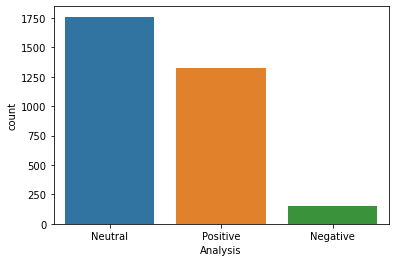

In [27]:
#using seaborn visualize the Analysis
import seaborn as sns
sns.countplot(x='Analysis',data=tweets_df)

C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


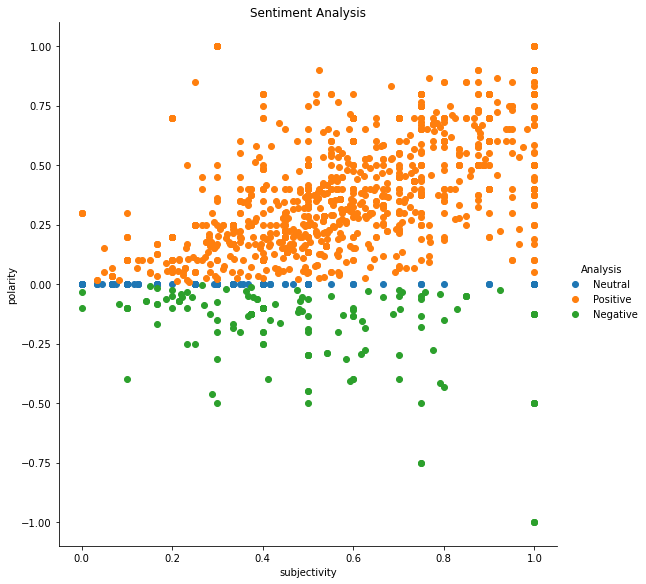

In [28]:
#
g = sns.FacetGrid(tweets_df,hue="Analysis", size=8)
g.map(plt.scatter, "subjectivity", "polarity")
plt.title("Sentiment Analysis")
g.add_legend()
plt.show()

In [29]:
#get the percentage of positive tweets
ptweets=tweets_df[tweets_df.Analysis=="Positive"]
ptweets =ptweets["text"]     
round((ptweets.shape[0]/tweets_df.shape[0])*100,1)
                  

41.0

In [30]:
#get the percentage of nagative tweets
Ntweets=tweets_df[tweets_df.Analysis=="Negative"]
Ntweets =Ntweets["text"]     
round((Ntweets.shape[0]/tweets_df.shape[0])*100,1)
                  

4.7

In [31]:
#get the percentage of neutaral tweets
Ntweets=tweets_df[tweets_df.Analysis=="Neutral"]
Ntweets =Ntweets["text"]     
round((Ntweets.shape[0]/tweets_df.shape[0])*100,1)

54.4

# Training, Evaluation and Prediction¶


After sentimental analysis I am going to build a model for tweet analysis

here we have three types tweets analysis: positive, negative and neutral

so build a model to classify which tweets is positive,negative and neutral

in our tweets_df data set "Analysis" is our target variables, otherrs are features

In [32]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          3240 non-null   object 
 1   subjectivity  3240 non-null   float64
 2   polarity      3240 non-null   float64
 3   Analysis      3240 non-null   object 
dtypes: float64(2), object(2)
memory usage: 101.4+ KB


# Training, Evaluation and Prediction

In [97]:
#replace target variable which is categorical  into numerical form
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
tweets_df['Analysis']= label_encoder.fit_transform(tweets_df['Analysis']) 
  
tweets_df['Analysis'].unique()

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([1, 2, 0], dtype=int64)

In [98]:
tweets_df.head()

,text,subjectivity,polarity,Analysis
0,co urec yir j,0.000000,0.00,1
1,co zgayzgrt v,0.000000,0.00,1
2,let local poshan nation home dozen healthy dis...,0.346667,0.22,2
3,proper nutrition vital build prosperous nation...,0.250000,0.05,2
4,addressing conference governor national educat...,0.000000,0.00,1


In [166]:
X=tweets_df['text']
y=tweets_df['Analysis']
X.shape,y.shape

((3240,), (3240,))

In [167]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [168]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2430,)
(810,)
(2430,)
(810,)


# Vectorizing our dataset

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [169]:
#transforming test data and train data in to a document term matrix
X_Train_Dtm=vectorizer.fit_transform(X_train)
X_Test_Dtm=vectorizer.transform(X_test)

In [170]:
X_Train_Dtm.shape, y_train.shape,X_Test_Dtm.shape, y_test.shape

((2430, 8091), (2430,), (810, 8091), (810,))

# Building and evaluating a model

In [171]:
from sklearn.naive_bayes import MultinomialNB 
nb=MultinomialNB()

In [172]:
## train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_Train_Dtm,y_train)

Wall time: 3.99 ms


MultinomialNB()

In [173]:
X_Train_Dtm.shape, y_train.shape,X_Test_Dtm.shape

((2430, 8091), (2430,), (810, 8091))

In [174]:
# make class predictions for X_test_dtm
y_pred=nb.predict(X_Test_Dtm)
print(y_pred)

[1 1 1 2 1 1 2 1 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 1
 1 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 2
 1 1 2 2 1 2 2 1 2 1 1 2 2 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 2 1 2 2 1 2
 2 2 1 2 2 1 2 1 2 2 2 2 2 2 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 2 2 1 2 2 1 1 2
 1 1 2 1 2 2 2 2 2 2 1 2 1 1 2 1 2 1 1 1 1 2 1 2 2 2 2 1 1 1 2 1 1 1 1 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 2 2 1 2 2 2 1 2 2 2 2 1 2 1 2 1 1 1 2 2 1
 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 1 1 2 2 2 1 2 1 2 1 2 2 2 2
 2 2 2 2 1 2 2 1 1 1 2 2 1 2 2 2 2 2 2 1 1 1 1 2 2 1 2 2 2 2 2 1 1 1 2 2 1
 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 1 1 2 2 2 1 1 2 1
 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 2 1 1 2 2 1 1 2 2 1 2 2 2 1 2 1 1 1 2 1 1 2
 2 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2 2 1 2 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 1 2
 2 1 1 2 1 1 2 2 1 1 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1 1 2 2 1 2
 2 1 1 2 1 1 2 2 1 1 1 1 

In [175]:
y_pred.shape, y_test.shape

((810,), (810,))

In [176]:
## calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7938271604938272

In [177]:
## print the confusion matrix
metrics.confusion_matrix(y_test,y_pred)

array([[  0,  15,  18],
       [  0, 355,  85],
       [  0,  49, 288]], dtype=int64)

In [178]:
#create final data frame that contains actual and predicted data
pred_data=pd.DataFrame(y_pred)
final_data=pd.concat([tweets_df[["text","Analysis"]],pred_data],axis=1)
final_data.columns=["text","actual_data","predicted_data"]
final_data.head(20)

,text,actual_data,predicted_data
0,co urec yir j,1,1.0
1,co zgayzgrt v,1,1.0
2,let local poshan nation home dozen healthy dis...,2,1.0
3,proper nutrition vital build prosperous nation...,2,2.0
4,addressing conference governor national educat...,1,1.0
5,tomorrow th september join conference rashtrap...,1,1.0
6,always remember pujya kesavananda bharati ji c...,1,2.0
7,rt india iran teachersday charanjot patwalia s...,1,1.0
8,rt indembmanila m jayasree pisharodi teacher p...,1,2.0
9,rt indian embassy teacher make difference clas...,1,2.0
